[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



✅ Logistic Regression Results:
Accuracy: 0.9859688195991091

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4311
           1       0.99      0.98      0.99      4669

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



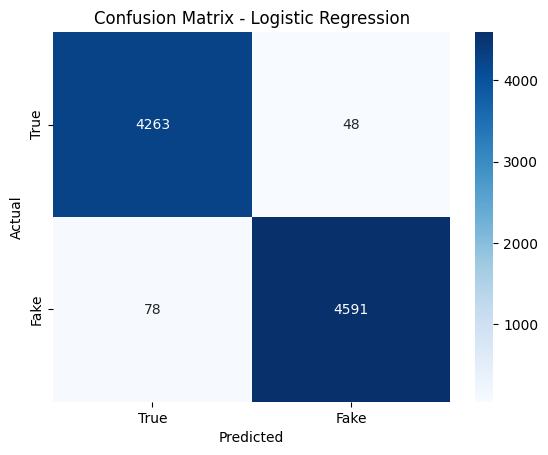

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 201s 439ms/step - accuracy: 0.9111 - loss: 0.2294 - val_accuracy: 0.9445 - val_loss: 0.1323
Epoch 2/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 214s 477ms/step - accuracy: 0.9752 - loss: 0.0805 - val_accuracy: 0.9720 - val_loss: 0.0857
Epoch 3/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 237s 529ms/step - accuracy: 0.9527 - loss: 0.1164 - val_accuracy: 0.9720 - val_loss: 0.0820
Epoch 4/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 232s 516ms/step - accuracy: 0.9818 - loss: 0.0564 - val_accuracy: 0.9820 - val_loss: 0.0590
Epoch 5/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 235s 524ms/step - accuracy: 0.9800 - loss: 0.0608 - val_accuracy: 0.9868 - val_loss: 0.0394
281/281 ━━━━━━━━━━━━━━━━━━━━ 43s 151ms/step - accuracy: 0.9907 - loss: 0.0295



✅ LSTM Test Accuracy: 0.9908
LSTM model saved successfully.


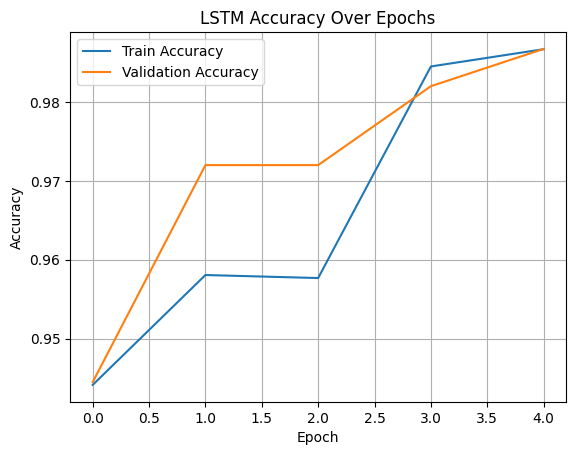

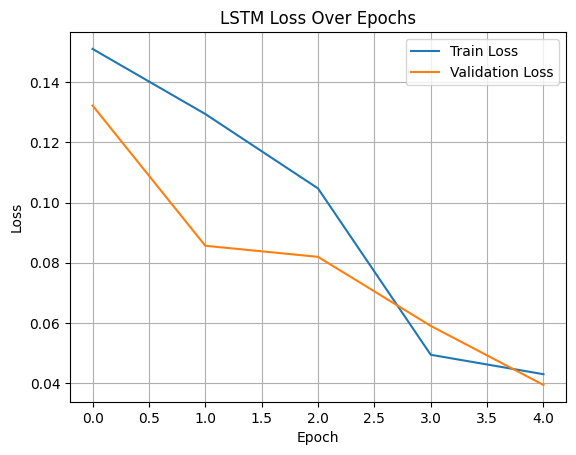

In [53]:
# 📘 Phase 1: Import Required Libraries
import pandas as pd
import numpy as np
import re
import nltk
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

nltk.download('stopwords')

# ✅ Constants
DATA_PATH = 'C:\\CodeShell_Core\\GitHub_Repository\\fake-news-detector\\notebooks\\combined_news.csv'
CLEANED_DATA_PATH = 'C:\\CodeShell_Core\\GitHub_Repository\\fake-news-detector\\src\\cleaned_news.csv'
TFIDF_VECTORIZER_PATH = 'C:\\CodeShell_Core\\GitHub_Repository\\fake-news-detector\\model\\tfidf_vectorizer.pkl'
TOKENIZER_PATH = 'C:\\CodeShell_Core\\GitHub_Repository\\fake-news-detector\\model\\tokenizer.pkl'
LSTM_MODEL_PATH = 'C:\\CodeShell_Core\\GitHub_Repository\\fake-news-detector\\model\\fake_news_lstm_model.h5'

# 📘 Phase 2: Text Preprocessing
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www.\S+', '', text)          # Remove URLs
    text = re.sub(r'[^a-z\s]', '', text)                 # Remove punctuation & digits
    words = text.split()
    cleaned_words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(cleaned_words)

# 📘 Load & Clean Dataset
data = pd.read_csv(DATA_PATH)
data['clean_text'] = data['text'].apply(preprocess_text)
data.to_csv(CLEANED_DATA_PATH, index=False)

# 📘 Phase 3: Feature Extraction with TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(data['clean_text'])
y = data['label']

# Split for TF-IDF model
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Save TF-IDF Vectorizer
with open(TFIDF_VECTORIZER_PATH, 'wb') as f:
    pickle.dump(tfidf, f)

# 📘 Phase 4: Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)

print("\n✅ Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['True', 'Fake'], yticklabels=['True', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# 📘 Phase 5: Deep Learning Model (LSTM)
# Tokenize full text (not cleaned version for better context)
max_words = 5000
maxlen = 500
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['text'])

# Save Tokenizer
with open(TOKENIZER_PATH, 'wb') as f:
    pickle.dump(tokenizer, f)

# Sequence & pad
X_seq = tokenizer.texts_to_sequences(data['text'])
X_pad = pad_sequences(X_seq, maxlen=maxlen)

# Split for LSTM
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# Build LSTM Model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=maxlen))
lstm_model.add(LSTM(64))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.summary()

# Train LSTM Model
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = lstm_model.fit(X_train_dl, y_train_dl,
                         epochs=5,
                         batch_size=64,
                         validation_split=0.2,
                         callbacks=[early_stop])

# Evaluate
loss, accuracy = lstm_model.evaluate(X_test_dl, y_test_dl)
print(f"\n✅ LSTM Test Accuracy: {accuracy:.4f}")

# Save LSTM Model
lstm_model.save(LSTM_MODEL_PATH)
print("LSTM model saved successfully.")

# Plot Accuracy & Loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [1]:
from tensorflow.keras.models import load_model

# Load your existing .h5 model
model = load_model('C:\\CodeShell_Core\\GitHub_Repository\\fake-news-detector\\model\\fake_news_lstm_model.h5')

# Save it in the new recommended format (.keras)
model.save('C:\\CodeShell_Core\\GitHub_Repository\\fake-news-detector\\model\\fake_news_lstm_model.keras', save_format='keras')
